# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import date

# Import API key
from api_keys import ow_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today's Date
today = date.today()

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count = len(cities)
city_count

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [63]:
# url = 'https://api.openweathermap.org/data/2.5/weather'
# query_url = f'{url}?q={cities[0]}&units=imperial&appid={ow_key}'

# response = requests.get(query_url).json()

# pprint(response['name'])


'Ushuaia'


In [66]:
print('Beginning Data Retrieval')
print('------------------------')

name = []
lat = []
lng = []
max_temp = []
humid = []
clouds = []
wind = []
country = []
date = []

# Loop through cities collecting weather data for each city
for i, city in enumerate(cities):
    
    print(f'Processing record {i+1}: {city}')
    
    time.sleep(1)
   
    # Declare query url
    url = 'https://api.openweathermap.org/data/2.5/weather'
    query_url = f'{url}?q={city}&units=imperial&appid={ow_key}'

    response = requests.get(query_url).json()

    try:
        
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

    except:

        print(f'Skipping {city}: No data available')
        
print('------------------------')
print('Data Retrevial Complete')
print('------------------------')
    

Beginning Data Retrieval
------------------------
Processing record 1: ushuaia
Processing record 2: manta
Processing record 3: busselton
Processing record 4: ponta do sol
Processing record 5: nizhneyansk
Skipping nizhneyansk: No data available
Processing record 6: albany
Processing record 7: amahai
Processing record 8: mataura
Processing record 9: ranot
Processing record 10: belushya guba
Skipping belushya guba: No data available
Processing record 11: sao filipe
Processing record 12: lompoc
Processing record 13: barrow
Processing record 14: harper
Processing record 15: bambous virieux
Processing record 16: fort nelson
Processing record 17: caravelas
Processing record 18: saskylakh
Processing record 19: bluff
Processing record 20: hobart
Processing record 21: hay river
Processing record 22: chagda
Skipping chagda: No data available
Processing record 23: lorengau
Processing record 24: santa isabel do rio negro
Processing record 25: leningradskiy
Processing record 26: cherskiy
Processing 

Processing record 233: mayo
Processing record 234: gazimurskiy zavod
Processing record 235: paamiut
Processing record 236: tevriz
Processing record 237: mahebourg
Processing record 238: karangasem
Processing record 239: pundaguitan
Processing record 240: halalo
Skipping halalo: No data available
Processing record 241: ketchikan
Processing record 242: hovd
Processing record 243: kralendijk
Processing record 244: nantucket
Processing record 245: agogo
Processing record 246: linxia
Processing record 247: dujuma
Skipping dujuma: No data available
Processing record 248: mys shmidta
Skipping mys shmidta: No data available
Processing record 249: domoni
Processing record 250: xinqing
Processing record 251: upernavik
Processing record 252: scarborough
Processing record 253: zhigansk
Processing record 254: temirtau
Processing record 255: wainwright
Processing record 256: jizan
Processing record 257: pakala
Processing record 258: carlos chagas
Processing record 259: port hedland
Processing record

Processing record 464: cheuskiny
Skipping cheuskiny: No data available
Processing record 465: djambala
Processing record 466: port keats
Processing record 467: ilasan
Processing record 468: namatanai
Processing record 469: ugoofaaru
Processing record 470: vanavara
Processing record 471: toora-khem
Processing record 472: barra do corda
Processing record 473: boz
Processing record 474: mayumba
Processing record 475: jieshi
Processing record 476: mudgee
Processing record 477: iqaluit
Processing record 478: jumla
Processing record 479: barentsburg
Skipping barentsburg: No data available
Processing record 480: pandhana
Processing record 481: mitsamiouli
Processing record 482: lisakovsk
Processing record 483: college
Processing record 484: prince rupert
Processing record 485: nakamura
Processing record 486: bathsheba
Processing record 487: beringovskiy
Processing record 488: lasa
Processing record 489: touros
Processing record 490: viligili
Skipping viligili: No data available
Processing rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
city_df = pd.DataFrame({'City': name,
                        'Latitude': lat,
                        'Longitude': lng,
                        'Max Temp': max_temp,
                        'Humidity': humid,
                        'Cloudiness': clouds,
                        'Wind Speed': wind,
                        'Country': country,
                        'Date': date})

city_df.to_csv(output_data_file)

city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,44.60,70,75,5.86,AR,1603587071
1,Manta,-0.95,-80.73,73.40,78,90,8.05,EC,1603586852
2,Busselton,-33.65,115.33,73.99,34,29,10.31,AU,1603586630
3,Ponta do Sol,32.67,-17.10,62.60,77,20,4.70,PT,1603586853
4,Albany,42.60,-73.97,46.99,67,43,4.00,US,1603586944


In [99]:
city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.457505,18.331013,59.906872,73.358047,55.822785,8.093128,1.603588e+09
std,32.992384,91.318924,20.567046,19.778626,41.100941,5.753990,3.096301e+02
min,-54.800000,-175.200000,6.550000,13.000000,0.000000,0.040000,1.603587e+09
25%,-7.250000,-63.180000,46.400000,63.000000,8.000000,3.800000,1.603587e+09
50%,22.080000,23.270000,64.400000,78.000000,75.000000,6.850000,1.603588e+09
75%,47.870000,100.320000,77.000000,88.000000,100.000000,11.410000,1.603588e+09
max,78.220000,179.320000,92.800000,100.000000,100.000000,40.310000,1.603588e+09


## Inspect the data and remove the cities where the humidity > 95%.
----


In [100]:
#  Get the indices of cities that have humidity over 95%.
high_humid = [i for i, row in city_df.iterrows() if row['Humidity'] > 95]

print(high_humid)


# for i, row in city_df.iterrows():
#     if row['Humidity'] > 100:
#         print(i)

[28, 31, 49, 51, 70, 79, 86, 92, 96, 103, 122, 153, 204, 208, 216, 224, 230, 254, 300, 304, 316, 339, 341, 369, 421, 426, 432, 449, 451, 489, 494, 504, 508, 511, 520, 549]


In [107]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(high_humid)
city_df.head()
clean_city_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,5.170000e+02
mean,18.717950,17.674700,60.708511,71.642166,53.992263,8.224023,1.603588e+09
std,32.786829,92.516001,20.347342,19.313148,41.011956,5.733843,3.090209e+02
min,-54.800000,-175.200000,6.550000,13.000000,0.000000,0.040000,1.603587e+09
25%,-7.960000,-65.710000,46.990000,62.000000,6.000000,4.000000,1.603587e+09
50%,20.500000,23.420000,65.120000,77.000000,73.000000,6.930000,1.603588e+09
75%,45.760000,100.340000,77.320000,87.000000,97.000000,11.410000,1.603588e+09
max,78.220000,179.320000,92.800000,95.000000,100.000000,40.310000,1.603588e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

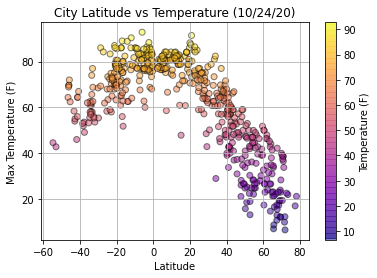

In [130]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Max Temp'],
            c=clean_city_df['Max Temp'],
            cmap = 'plasma',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Temperature ({today.strftime("%m/%d/%y")})')
plt.show()

## Latitude vs. Humidity Plot

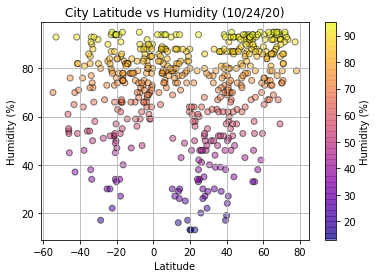

In [131]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Humidity'],
            c=clean_city_df['Humidity'],
            cmap = 'plasma',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({today.strftime("%m/%d/%y")})')
plt.show()

## Latitude vs. Cloudiness Plot

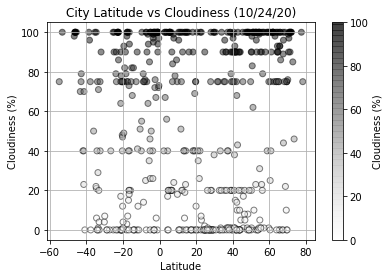

In [132]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Cloudiness'],
            c=clean_city_df['Cloudiness'],
            cmap = 'Greys',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({today.strftime("%m/%d/%y")})')
plt.show()

## Latitude vs. Wind Speed Plot

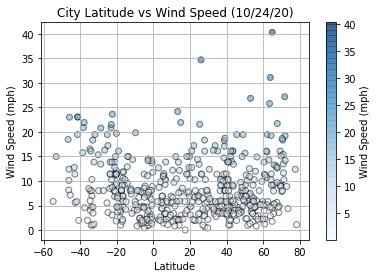

In [133]:
plt.scatter(clean_city_df['Latitude'],
            clean_city_df['Wind Speed'],
            c=clean_city_df['Wind Speed'],
            cmap = 'Blues',
            alpha=0.5,
            edgecolors='black')
plt.grid()
plt.colorbar().set_label('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({today.strftime("%m/%d/%y")})')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


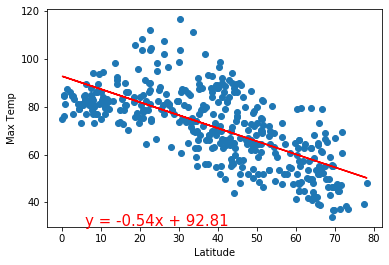

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


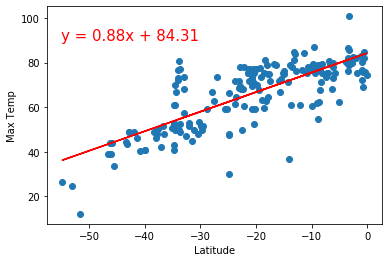

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


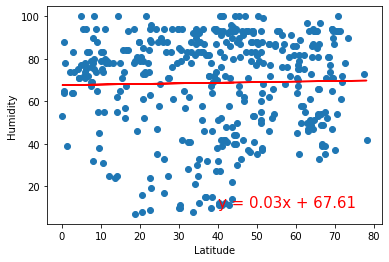

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


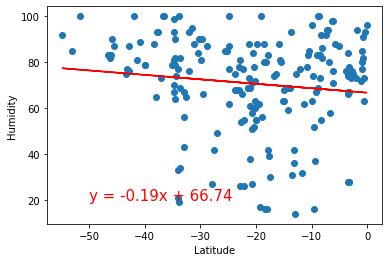

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


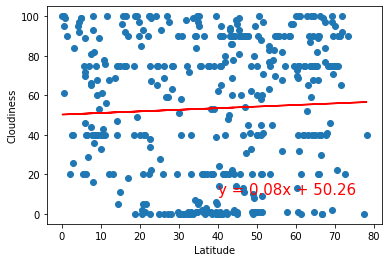

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


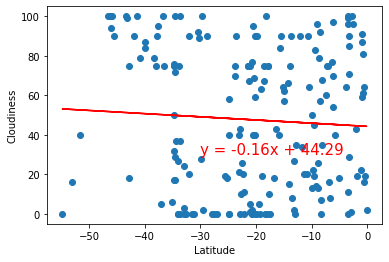

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


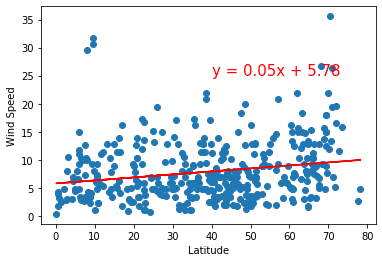

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


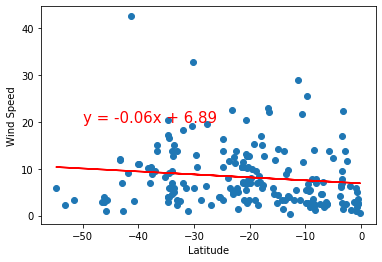